In [1]:
import numpy as np
import pyemma as pe
import pandas as pd
import itertools
import mdtraj as md
import matplotlib.pyplot as plt
import mdtraj as md
import numpy as np
from __future__ import print_function
import matplotlib
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import seaborn as sns

import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
from pyemma import config
import math
import sys
np.set_printoptions(threshold=sys.maxsize)
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
cutoff=0.45
ab_seq_no_ter = 'AEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVI'
ab_seq = 'DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA'


In [13]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [15]:
def weighted_avg_and_std(values):
    average = np.average(values)
    variance = np.average((values-average)**2)
    return (math.sqrt(variance))

In [16]:
def difference(x,y):
    done=x-y
    return (abs(done))

In [17]:
c_AB = (0.7686, 0.4196, 0.1882, 1)   #set color for AB points
e_AB = (0.7686, 0.4196, 0.1882, 0.5) #set color for AB errors
c_G5 = (0.3725, 0.5804, 0.4588, 1)   #set color for AB+10074-G5 points
e_G5 = (0.3725, 0.5804, 0.4588, 0.5) #set color for AB+10074-G5 errors
blue_dark  = (0.4392, 0.5961, 0.8196) #set dark blue
blue_light = (0.6549, 0.7765, 0.8941) #set light blue
red_dark   = (0.4431, 0.1059, 0.0941) #set dark red
red_light  = (0.6392, 0.4118, 0.3882) #set light red


In [20]:
sim_names = ('ligandA',"ligandB", "ligandC","ligandD")

top, trajs = {}, {}
#trajs = {k: sorted(glob("/pool/work/adelie/results_G5_der/input_data/trajectories/{0}/*_traj.xtc".format(k))) for k in sim_names}
trajfir={k: "/pool/work/adelie/results_G5_der/input_data/trajectories/firsthalf{0}.xtc".format(k) for k in sim_names}
trajsec={k: "/pool/work/adelie/results_G5_der/input_data/trajectories/secondhalf{0}.xtc".format(k) for k in sim_names}
#top = {k: "/pool/work/adelie/results_G5_der/input_data/topology/{0}/*.gro".format(k) for k in sim_names}
top = {k: "/pool/work/adelie/results_G5_der/input_data/topology/{0}.gro".format(k) for k in sim_names}
#weight={k: "/pool/work/adelie/results_G5_der/input_data/weights/{0}_weights".format(k) for k in sim_names}



#a_bias={k: "/pool/work/adelie/results_G5_der/input_data/topology/{0}/r?/*.gro".format(k) for k in 

0.3367754993964722
0.2962726922978076
0.30963916301798955
0.2551780541526019


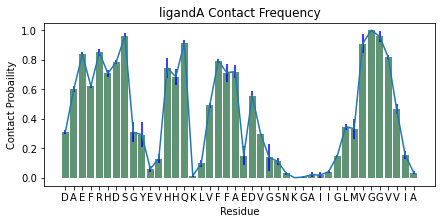

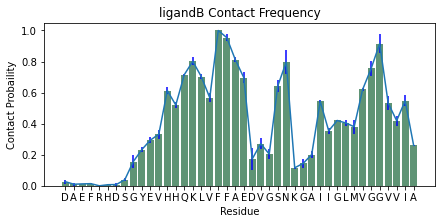

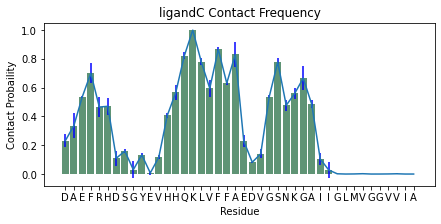

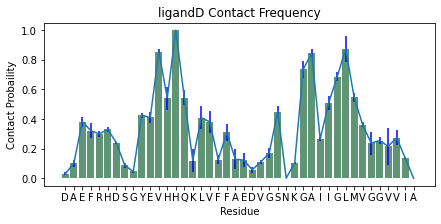

In [21]:
for k in (sim_names):
    #a_bias=np.genfromtxt(weight[k])
    #a_df=pd.DataFrame(a_bias[:,-1])
    #weight_a = np.array(a_df.apply(lambda x: math.exp(x/2.311420), axis=1))
    
    
    feat = coor.featurizer(top[k])
    n_res = 42 
    lig_ind = 43 
    ind_arr = np.zeros((n_res,2))
    for i in range(n_res):
        ind_arr[i][0] = lig_ind-1
        ind_arr[i][1] = i
    feat.add_residue_mindist(residue_pairs=ind_arr)

    inpconfir = pe.coordinates.source(trajfir[k], feat)
    inpconsec = pe.coordinates.source(trajsec[k], feat)
    mindistfir = np.array(inpconfir.get_output())
    mindistsec = np.array(inpconsec.get_output())

    #con = (weight_a[:, None] * (mindist< cutoff)).sum(axis=0)
    confir = ((mindistfir< cutoff)).sum(axis=0)
    total_1_axisfir = np.sum(confir, axis=0)
    consec = ((mindistsec< cutoff)).sum(axis=0)
    total_1_axissec = np.sum(consec, axis=0)
    
    total_1_axisfir=NormalizeData(total_1_axisfir)
    total_1_axissec=NormalizeData(total_1_axissec)

    var=difference(total_1_axisfir,total_1_axissec)
    con3=(np.array(total_1_axisfir) + np.array(total_1_axissec)) / 2.0
    print(np.std(con3))

    
    #scaled_x = NormalizeData(total_1_axis)
    fig, ax = plt.subplots(figsize=(7, 3))
    ratio = np.zeros((42))
    res = np.arange(1, 43)
    
    ax.bar(res,con3,color=c_G5)
    ax.set_xticks(res)
    #ax.set_title('Ligand Contact Frequency')
    ax.set_title("{} Contact Frequency".format(k),fontsize=12)
    ax.set_ylabel('Contact Probaility', fontsize=10)
    plt.errorbar(y=con3, x=res, yerr=var,ecolor="blue")
    ax.set_xlabel('Residue',fontsize=10)
    ax.xaxis.tick_bottom()
    ax.set_xticklabels(list(ab_seq),fontsize=10)
    #ax.legend()
    ax.tick_params(labeltop=False)
    ax.tick_params(labelbottom=True)